In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
import numpy as np

In [2]:
original_population_file = "Resources/population_growth_rate.csv"
original_population_data_df = pd.read_csv(original_population_file)

In [3]:
original_gdp_file = "Resources/gdp_per_capita.csv"
original_gdp_data_df = pd.read_csv(original_gdp_file)

In [4]:
original_happiness_2015_file = "Resources/world_happiness_report_2015.csv"
original_happiness_2016_file = "Resources/world_happiness_report_2016.csv"
original_happiness_2017_file = "Resources/world_happiness_report_2017.csv"
original_happiness_2018_file = "Resources/world_happiness_report_2018.csv"
original_happiness_2019_file = "Resources/world_happiness_report_2019.csv"

original_happiness_2015_data_df = pd.read_csv(original_happiness_2015_file)
original_happiness_2016_data_df = pd.read_csv(original_happiness_2016_file)
original_happiness_2017_data_df = pd.read_csv(original_happiness_2017_file)
original_happiness_2018_data_df = pd.read_csv(original_happiness_2018_file)
original_happiness_2019_data_df = pd.read_csv(original_happiness_2019_file)

In [5]:
population_data_df = original_population_data_df[['name_long', 'POP_GROWTH_RT','YEAR']].copy()
population_data_df = population_data_df.rename(columns={"name_long": "country",
                                                          "POP_GROWTH_RT": "PGR",
                                                          "YEAR": "year"})
population_data_df.drop_duplicates("country", inplace=True)
population_data_df.set_index("country", inplace=True)

population_data_df.head()

,PGR,year
country,,
Aruba,3.134888,1960
Afghanistan,1.813677,1960
Angola,1.803005,1960
Anguilla,NaN,1960
Albania,3.015423,1960


In [6]:
gdp_data_df = original_gdp_data_df[['Country', '2014','2015','2016','2017','2018']].copy()
gdp_data_df = gdp_data_df.rename(columns={"Country": "country"})
gdp_data_df.drop_duplicates("country", inplace=True)
gdp_data_df.set_index("country", inplace=True)
# gdp_data_df[gdp_data_df['2014'].apply(lambda x: str(x).isdigit())]
# gdp_data_df[gdp_data_df['2015'].apply(lambda x: str(x).isdigit())]
# gdp_data_df[gdp_data_df['2016'].apply(lambda x: str(x).isdigit())]
# gdp_data_df[gdp_data_df['2017'].apply(lambda x: str(x).isdigit())]
# gdp_data_df[gdp_data_df['2018'].apply(lambda x: str(x).isdigit())]
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2014']=='..'].index, inplace=True)
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2015']=='..'].index, inplace=True)
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2016']=='..'].index, inplace=True)
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2017']=='..'].index, inplace=True)
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2018']=='..'].index, inplace=True)
#gdp_data_df = pd.to_numeric(gdp_data_df["2018"], downcast="float")

gdp_data_df["2014"] = pd.to_numeric(gdp_data_df["2014"], downcast="float")
gdp_data_df["2015"] = pd.to_numeric(gdp_data_df["2015"], downcast="float")
gdp_data_df["2016"] = pd.to_numeric(gdp_data_df["2016"], downcast="float")
gdp_data_df["2017"] = pd.to_numeric(gdp_data_df["2017"], downcast="float")
gdp_data_df["2018"] = pd.to_numeric(gdp_data_df["2018"], downcast="float")


#gdp_data_df.to_csv('out.csv')
# gdp_data_clean =pd.DataFrame()
#print(len(gdp_data_df))
# for i,row in gdp_data_df.iterrows():
#     try: 
#         gdp_data_clean[i] = pd.to_numeric(row, downcast="float")
#     except: 
#         print(i)
#         gdp_data_df.drop(inplace=True)
#         passgdp_data_df["2014"] = pd.to_numeric(gdp_data_df["2014"], downcast="float")

In [7]:
gdp_mean_data=gdp_data_df[["2014","2015","2016","2017", "2018"]].mean(axis=1)


In [8]:
gdp_mean_data_df=gdp_mean_data.to_frame(name="GDP_per_capita")
len(gdp_mean_data_df)
gdp_mean_data_df.head()

,GDP_per_capita
country,
Afghanistan,1762.599976
Albania,11427.599609
Algeria,13805.000000
Angola,6297.200195
Antigua and Barbuda,22253.000000


In [9]:
happiness_2015_data_df = original_happiness_2015_data_df[['Country', 'Happiness Score']].copy()
happiness_2016_data_df = original_happiness_2016_data_df[['Country', 'Happiness Score']].copy()
happiness_2017_data_df = original_happiness_2017_data_df[['Country', 'Happiness.Score']].copy()
happiness_2018_data_df = original_happiness_2018_data_df[['Country or region', 'Score']].copy()
happiness_2019_data_df = original_happiness_2019_data_df[['Country or region', 'Score']].copy()

happiness_2015_data_df = happiness_2015_data_df.rename(columns={"Country": "country",
                                                               "Happiness Score": "happiness_score"})
happiness_2016_data_df = happiness_2016_data_df.rename(columns={"Country": "country",
                                                               "Happiness Score": "happiness_score"})
happiness_2017_data_df = happiness_2017_data_df.rename(columns={"Country": "country",
                                                               "Happiness Score": "happiness_score"})
happiness_2018_data_df = happiness_2018_data_df.rename(columns={"Country or region": "country",
                                                               "Score": "happiness_score"})
happiness_2019_data_df = happiness_2019_data_df.rename(columns={"Country or region": "country",
                                                               "Score": "happiness_score"})

happiness_2015_data_df.drop_duplicates("country", inplace=True)
happiness_2016_data_df.drop_duplicates("country", inplace=True)
happiness_2017_data_df.drop_duplicates("country", inplace=True)
happiness_2018_data_df.drop_duplicates("country", inplace=True)
happiness_2019_data_df.drop_duplicates("country", inplace=True)
happiness_2015_data_df.set_index("country", inplace=True)
happiness_2016_data_df.set_index("country", inplace=True)
happiness_2017_data_df.set_index("country", inplace=True)
happiness_2018_data_df.set_index("country", inplace=True)
happiness_2019_data_df.set_index("country", inplace=True)

In [10]:
happiness_merged_data_df=pd.merge(happiness_2015_data_df, happiness_2016_data_df, left_index=True, right_index=True)

In [11]:
happiness_merged_data_df=pd.merge(happiness_merged_data_df, happiness_2017_data_df, left_index=True, right_index=True)

In [12]:
happiness_merged_data_df=pd.merge(happiness_merged_data_df, happiness_2018_data_df, left_index=True, right_index=True)

In [13]:
happiness_merged_data_df=pd.merge(happiness_merged_data_df, happiness_2019_data_df, left_index=True, right_index=True)

In [14]:
happiness_mean_data=happiness_merged_data_df[["happiness_score_x","happiness_score_y","Happiness.Score","happiness_score_x", "happiness_score_y"]].mean(axis=1)

In [15]:
happiness_mean_data_df=happiness_mean_data.to_frame(name="happiness_score")
len(happiness_mean_data_df)

141

#Happiness score mean per country

In [16]:

happiness_mean_data_df.head()

,happiness_score
country,
Switzerland,7.513333
Iceland,7.511778
Denmark,7.548667
Norway,7.541444
Canada,7.354444


In [17]:
GDP_happiness_df=pd.merge(happiness_mean_data_df, gdp_mean_data_df, left_index=True, right_index=True)

In [18]:
len(GDP_happiness_df)

126

In [19]:
GDP_happiness_population_df=pd.merge(GDP_happiness_df, population_data_df, left_index=True, right_index=True)

In [20]:
len(GDP_happiness_population_df)

126

In [21]:
#GDP_happiness_population_df.drop(['year'], axis='columns', inplace=True)
GDP_happiness_population_df.head()

,happiness_score,GDP_per_capita,PGR,year
country,,,,
Switzerland,7.513333,57834.000000,2.172274,1960
Iceland,7.511778,46052.601562,1.795327,1960
Denmark,7.548667,46462.000000,0.665279,1960
Norway,7.541444,64414.601562,0.839369,1960
Canada,7.354444,43447.199219,2.298627,1960


In [22]:
GDP_happiness_population_df.drop(columns=["year"] , inplace=True)

In [23]:
len(GDP_happiness_population_df)


126

In [24]:
GDP_happiness_population_df.head()

,happiness_score,GDP_per_capita,PGR
country,,,
Switzerland,7.513333,57834.000000,2.172274
Iceland,7.511778,46052.601562,1.795327
Denmark,7.548667,46462.000000,0.665279
Norway,7.541444,64414.601562,0.839369
Canada,7.354444,43447.199219,2.298627


In [27]:
GDP_happiness_population_df['happiness_score'] = GDP_happiness_population_df['happiness_score'].round(2)
GDP_happiness_population_df['GDP_per_capita'] = GDP_happiness_population_df['GDP_per_capita'].astype('float64').round(2)
GDP_happiness_population_df['PGR'] = GDP_happiness_population_df['PGR'].round(2)

GDP_happiness_population_df.head()

,happiness_score,GDP_per_capita,PGR
country,,,
Switzerland,7.51,57834.0,2.17
Iceland,7.51,46052.6,1.80
Denmark,7.55,46462.0,0.67
Norway,7.54,64414.6,0.84
Canada,7.35,43447.2,2.30


In [28]:
GDP_happiness_population_df_happiness_score_fixed = np.nan_to_num(GDP_happiness_population_df['happiness_score'])
GDP_happiness_population_df_gdp_fixed = np.nan_to_num(GDP_happiness_population_df['GDP_per_capita'].astype('float64'))
GDP_happiness_population_df_pgr_fixed = np.nan_to_num(GDP_happiness_population_df['PGR'])

GDP_happiness_population_df['happiness_score'] = GDP_happiness_population_df_happiness_score_fixed
GDP_happiness_population_df['GDP_per_capita'] = GDP_happiness_population_df_gdp_fixed
GDP_happiness_population_df['PGR'] = GDP_happiness_population_df_pgr_fixed

GDP_happiness_population_df.head()

,happiness_score,GDP_per_capita,PGR
country,,,
Switzerland,7.51,57834.0,2.17
Iceland,7.51,46052.6,1.80
Denmark,7.55,46462.0,0.67
Norway,7.54,64414.6,0.84
Canada,7.35,43447.2,2.30


The correlation between both factors is 0.0


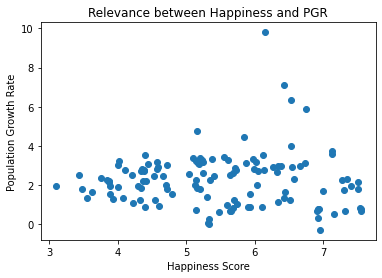

In [29]:
plt.scatter(GDP_happiness_population_df['happiness_score'],GDP_happiness_population_df['PGR'])
plt.title("Relevance between Happiness and PGR")
plt.xlabel("Happiness Score")
plt.ylabel("Population Growth Rate")

correlation = st.pearsonr(GDP_happiness_population_df['happiness_score'],GDP_happiness_population_df['PGR'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

0.7240306192339702 9.7878220585277e-22 1140.8405288849501
The correlation between both factors is 0.72


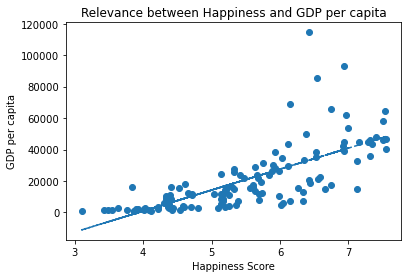

In [30]:
plt.scatter(GDP_happiness_population_df['happiness_score'],GDP_happiness_population_df['GDP_per_capita'])
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(GDP_happiness_population_df['happiness_score'], GDP_happiness_population_df['GDP_per_capita'])
m_fit = m_slope * GDP_happiness_population_df['happiness_score'] + m_int
plt.plot(GDP_happiness_population_df['happiness_score'],m_fit,"--")
plt.title("Relevance between Happiness and GDP per capita")
plt.xlabel("Happiness Score")
plt.ylabel("GDP per capita")

correlation = st.pearsonr(GDP_happiness_population_df['happiness_score'],GDP_happiness_population_df['GDP_per_capita'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.14


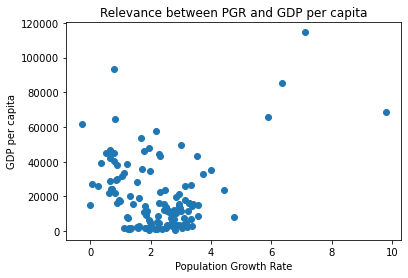

In [31]:
plt.scatter(GDP_happiness_population_df['PGR'],GDP_happiness_population_df['GDP_per_capita'])

plt.title("Relevance between PGR and GDP per capita")
plt.xlabel("Population Growth Rate")
plt.ylabel("GDP per capita")

correlation = st.pearsonr(GDP_happiness_population_df['PGR'],GDP_happiness_population_df['GDP_per_capita'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
GDP_happiness_population_df.to_csv('out.csv')

In [ ]:
GDP_happiness_population_df.sort_values

In [ ]:
connection_string = "postgres:postgres@localhost:5432/countries_db"
engine = create_engine(f'postgresql://{connection_string}')

In [ ]:
engine.table_names()

In [ ]:
GDP_happiness_population_df.to_sql(name='countries', con=engine, if_exists='replace', index=True)